In [1]:
using Revise
using NonEqDigits

In [2]:
using GLMakie
using CairoMakie
using JLD2
using Geppetto

In [3]:
includet("../scripts/ma_graphviz.jl")

In [4]:
includet("../scripts/ma_colors.jl")
single_col_width = 324 # corresponds to 3+3/8 in as state in PR guidelines
double_col_width = single_col_width*2
golden_ratio = 1.618
nothing

# Showing the networks

In [5]:
# for the splitprob coloring code
includet("../scripts/ma_comp_v3.jl")

## General

In [6]:
function make_0sv1s_p4(ma)
    layout = get_gv_layout_positions(ma;
        cluster=true,
        ranksep="2",
        normalize_x=true,
        normalize_y=(10, 20)
    )

    coldict = get_all0sv1s_colors_v2(ma.mg)
    collist = []
    for v in 1:nv(ma.mg)
        l = label_for(ma.mg, v)
        push!(collist, coldict[l])
    end

    vs_in_acs = reduce(vcat, attracting_components(ma.mg))
    isac = [i in vs_in_acs for i in 1:nv(ma.mg)]
    
    node_marker=[:circle for _ in 1:nv(ma.mg)]
    for v in vs_in_acs
        node_marker[v] = :rect
    end

    # edge_color = [isac[e.src] ? :black : :gray for e in edges(ma.mg)]
    edge_color = [MAColors.gray1() for e in edges(ma.mg)]

    faa = plotgm(ma;
        layout,
        flabels=false,
        e_color=false,
        node_color=collist,
        node_marker,
        edge_color
    )
    faa
end

make_0sv1s_p4 (generic function with 1 method)

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweighteddigraph.jl:170


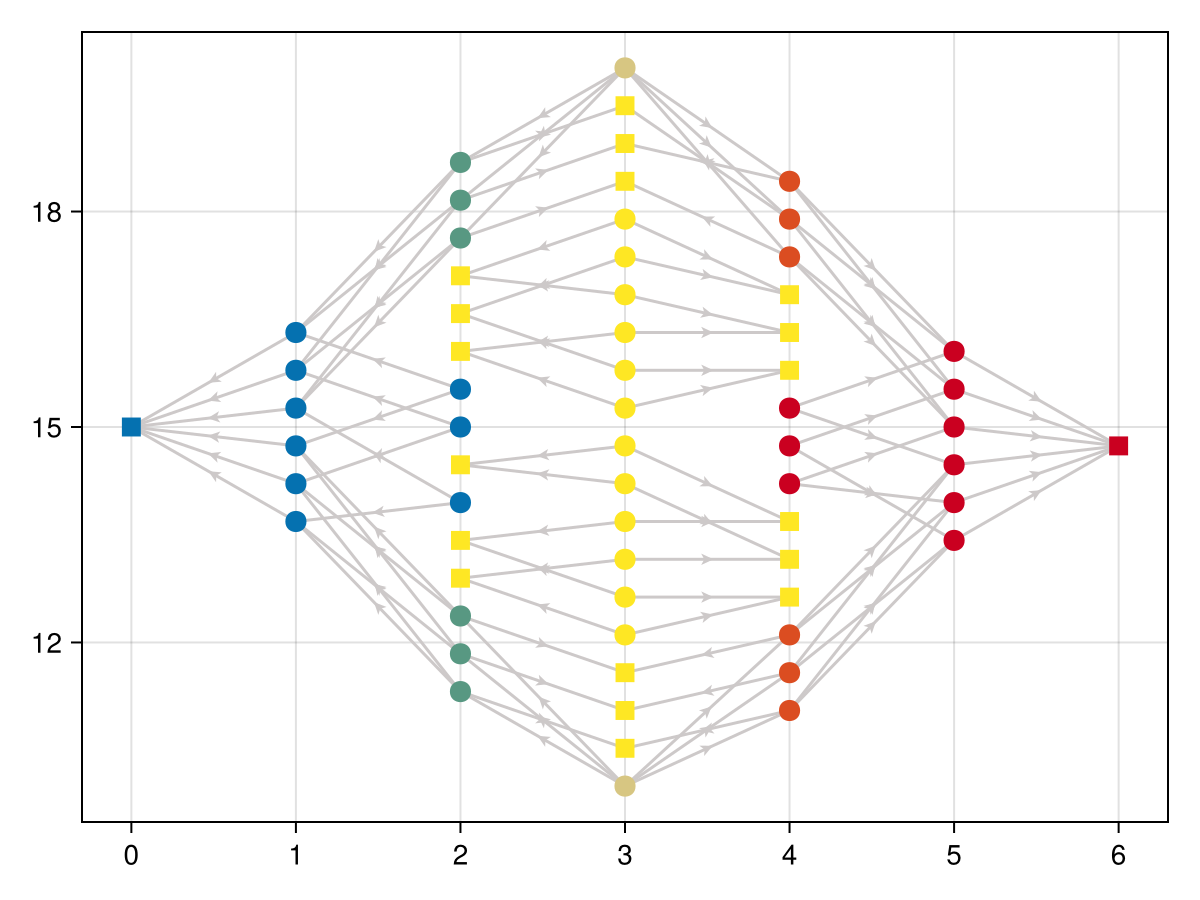

In [7]:
ma = MolAut(6, 232)
# g = molaut_gv(ma;
#     # simple_nodes=true,
#     cluster=true,
    
#     ranksep="2.",
#     rankdir="LR",
#     nodesep="0.1",
#     size="5",
# )
make_0sv1s_p4(ma)

### Old

In [207]:
function make_0sv1s_p1(ma)
    g = molaut_gv(ma;
        # simple_nodes=true,
        cluster=true,
    
        highlight_acs="magenta",
        node_colors=get_all0sv1s_colors_v2(ma.mg),
        
        ranksep="0.8",
        size="10",
        rankdir="TB",
    )
end
make_0sv1s_p1(L, r; reduced=false) = make_0sv1s_p1(MolAut(L, r; reduced))

function make_0sv1s_p2(ma)
    g = molaut_gv(ma;
        # simple_nodes=true,
        cluster=true,
    
        highlight_acs="magenta",
        node_colors=get_all0sv1s_colors_v2(ma.mg),
        
        ranksep="0.8",
        size="10",
        rankdir="LR",
        nodesep="0.1"
    )
end
make_0sv1s_p2(L, r; reduced=false) = make_0sv1s_p2(MolAut(L, r; reduced))

make_0sv1s_p2 (generic function with 2 methods)

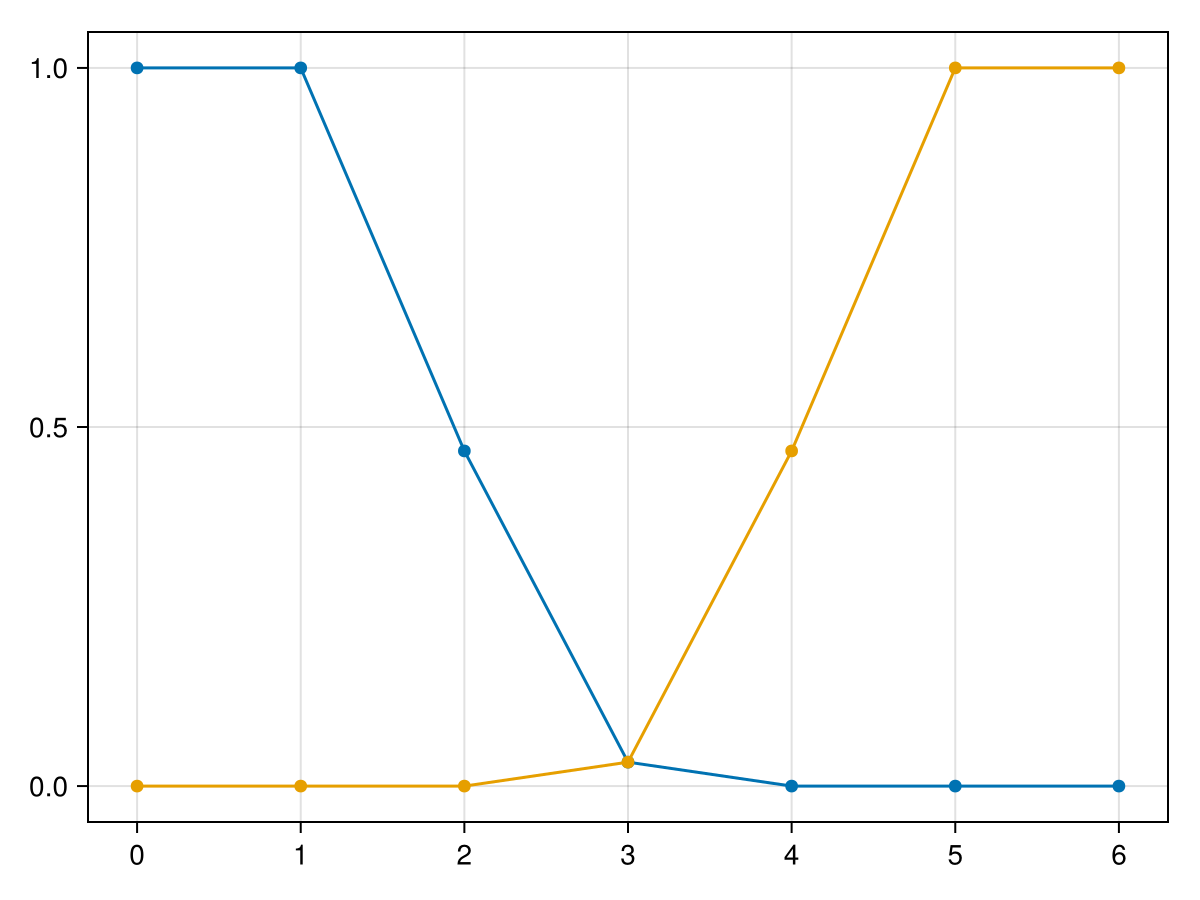

In [222]:
ma = MolAut(6, 232);
num1s, p0s, p1s = get_all0sv1s_avg_splitprobs(ma.mg)

fap = scatterlines(num1s, p0s)
scatterlines!(fap.axis, num1s, p1s)
fap

## Making the figure

### Version 2 (graphmakie)

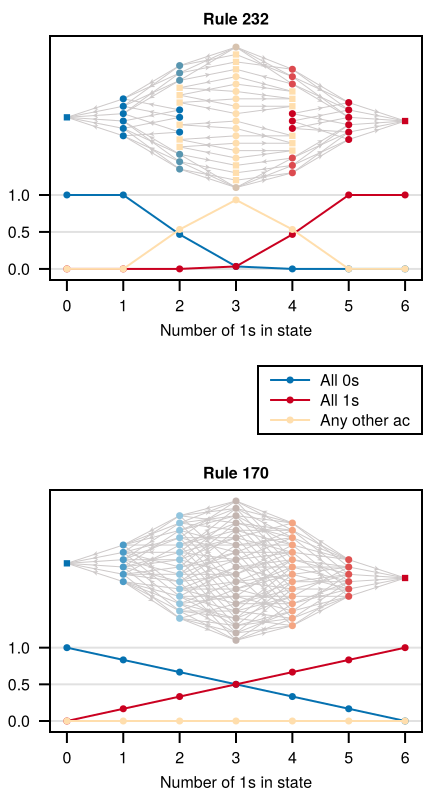

In [8]:
ma1 = MolAut(6, 232)
ma2 = MolAut(6, 170)

f = Figure(;
    size=(double_col_width / 3, double_col_width / golden_ratio),
    fontsize=8,
    figure_padding=5.,
)
ax1 = Axis(f[1,1])
ax2 = Axis(f[3,1])

legend_gl = GridLayout(f[2,1])

for (ax, ma) in zip([ax1, ax2], [ma1, ma2])
    # plot the avg split prob lines
    num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(ma.mg)
    sckw = (;
        markersize=5,
        linewidth=1
    )
    scatterlines!(ax, num1s, p0s;
        sckw...,
        label="All 0s",
        color=MAColors.bs_0s()
    )
    scatterlines!(ax, num1s, p1s;
        sckw...,
        label="All 1s",
        color=MAColors.bs_1s()
    )
    scatterlines!(ax, num1s, pxs;
        sckw...,
        label="Any other ac",
        color=MAColors.bs_else()
    )

    layout = get_gv_layout_positions(ma;
        cluster=true,
        ranksep="2",
        normalize_x=true,
        normalize_y=(1.1, 3.)
    )

    coldict = get_all0sv1s_colors_v2(ma.mg;
        cmap0sv1s=MAColors.bs_cmap(),
        nondetcolor=MAColors.bs_else()
    )
    collist = []
    for v in 1:nv(ma.mg)
        l = label_for(ma.mg, v)
        push!(collist, coldict[l])
    end

    vs_in_acs = reduce(vcat, attracting_components(ma.mg))
    isac = [i in vs_in_acs for i in 1:nv(ma.mg)]
    
    node_marker=[:circle for _ in 1:nv(ma.mg)]
    for v in vs_in_acs
        node_marker[v] = :rect
    end

    # edge_color = [isac[e.src] ? :black : :gray for e in edges(ma.mg)]
    edge_color = [MAColors.gray1() for e in edges(ma.mg)]

    p = plotgm!(ax, ma;
        layout,
        flabels=false,
        e_color=false,
        node_color=collist,
        node_marker,
        edge_color,
        node_size=5.0,
        edge_width=0.5,
        arrow_size=4.0,
    )

    ax.yticks = range(0., 1., 3)
    ax.xgridvisible = false

    ax.xlabel = "Number of 1s in state"
end

# hidexdecorations!(ax1)
# hidespines!(ax1, :t, :r, :b)
# hidespines!(ax2, :t, :r)
# rowgap!(f.layout, 5.)

rowsize!(f.layout, 2, Relative(0.1))
colsize!(f.layout, 1, Relative(1))

# Legend(legend_gl[1,1], ax1)
Legend(legend_gl[1,2], ax2;
    rowgap=-10.,
    padding=(6., 6., -3., -3.),
    # fontsize=6
)

ax1.title = "Rule 232"
ax2.title = "Rule 170"

save("../data/figures/0sv1s/draft2.pdf", f)

f

In [196]:
plt = pyimport("matplotlib.pyplot")
mplt = pyimport("mpltern")

Python: <module 'mpltern' from '/home/honza/UCLOneDrive/Projects/TopoStochSim/.CondaPkg/.pixi/envs/default/lib/python3.12/site-packages/mpltern/__init__.py'>

In [199]:
ax = plt.subplot(projection="ternary")
plt.show()

Python: None

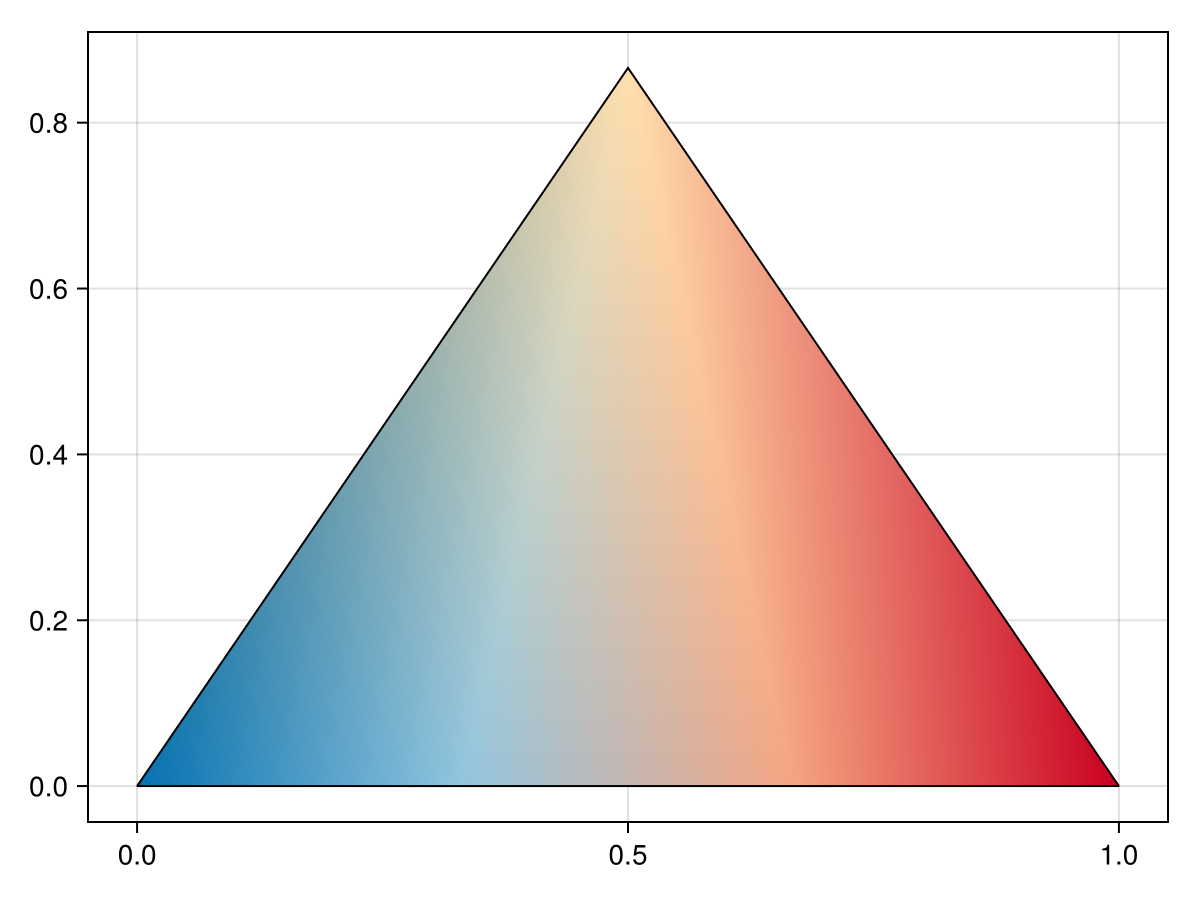

In [376]:
f = Figure()
ax = Axis(f[1,1])
all0sv1s_colors_v2_colorbar_v5!(ax, 100;
    cmap0sv1s=MAColors.bs_cmap(),
    nondetcolor=MAColors.bs_else()
)
# display(GLMakie.Screen(), f)
save("./kaka.pdf", f)
f

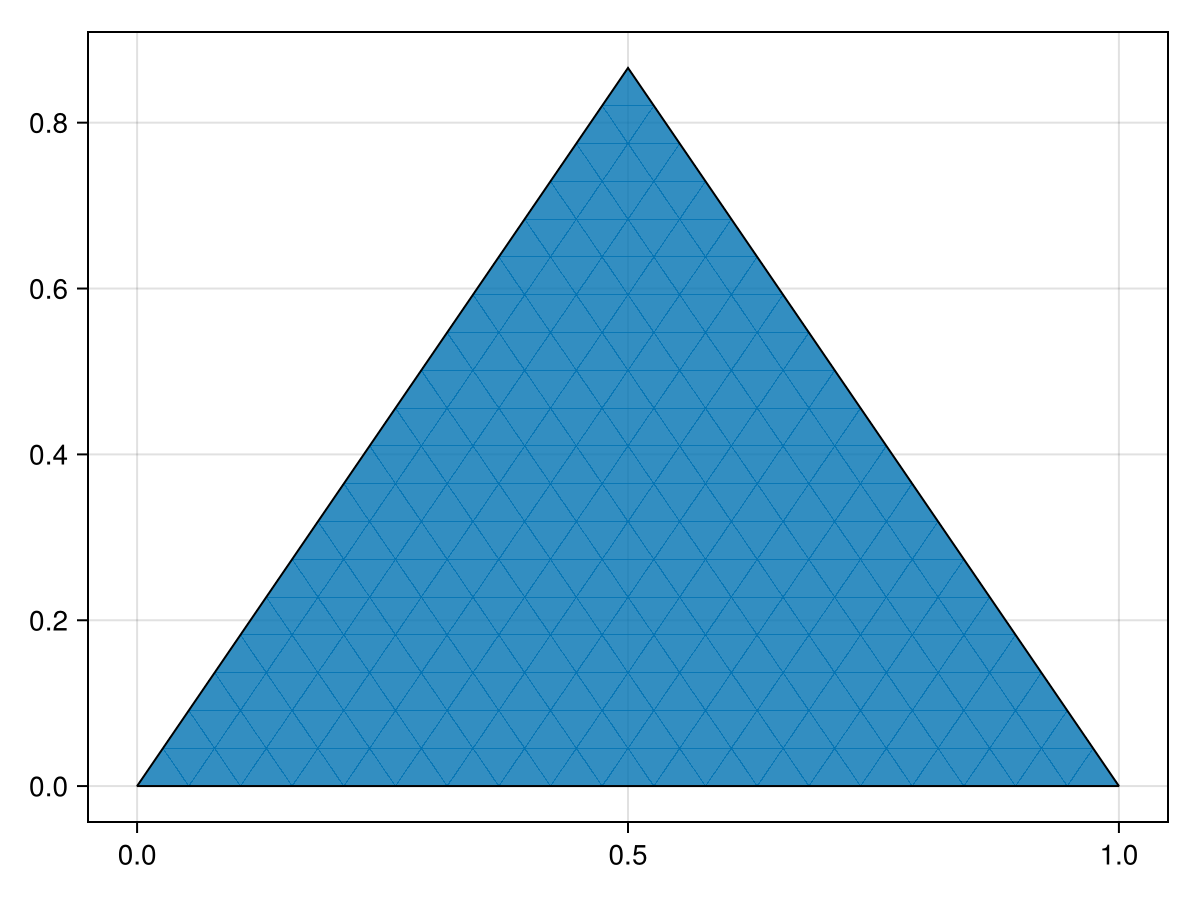

In [348]:
vertices = []
# centers = []
colors = []
vi_rows = []

N = 20
a = 1 / (N -1)
vi = 1
for ri in 1:N
    push!(vi_rows, [])
    for j in 1:(N-ri+1)
        push!(vi_rows[ri], vi)

        y = (ri - 1) * (sqrt(3) / 2) * a
        x = (ri - 1) * (a / 2) + a * (j - 1)
        pos = [x, y]
        
        push!(vertices, pos)

        # face_center = pos .+ [a / 2, (sqrt(3) / 4) * a]
        # @show face_center
        # push!(centers, face_center)

        vi += 1
    end
end

faces = []
for ri in 1:N
    # bulk
    for j in 2:(N-ri+1-1)
        push!(faces, [vi_rows[ri][j], vi_rows[ri][j+1], vi_rows[ri+1][j]])
        push!(faces, [vi_rows[ri][j], vi_rows[ri+1][j], vi_rows[ri+1][j-1]])
    end
    # left edge
    if ri != N
        push!(faces, [vi_rows[ri][1], vi_rows[ri][2], vi_rows[ri+1][1]])
    end
end

length.(vi_rows)
vi_rows

vertices = reduce(vcat, transpose.(vertices))
faces = reduce(vcat, transpose.(faces))

fap = mesh(vertices, faces;
#     color=colors,
#     shading=NoShading,
#     interpolate=false
)
poly!(fap.axis, [(0, 0), (1 / 2, sqrt(3) / 2), (1, 0)];
    color=:transparent,
    strokecolor=:black,
    strokewidth=1.0
)

# scatter!(fap.axis, getindex.(centers, 1), getindex.(centers, 2))

# fap.axis.xticks = range(0., 1., (N-1)+1)
# fap.axis.yticks = range(0., sqrt(3) / 2, (N-1)+1)

# display(GLMakie.Screen(), fap)
fap

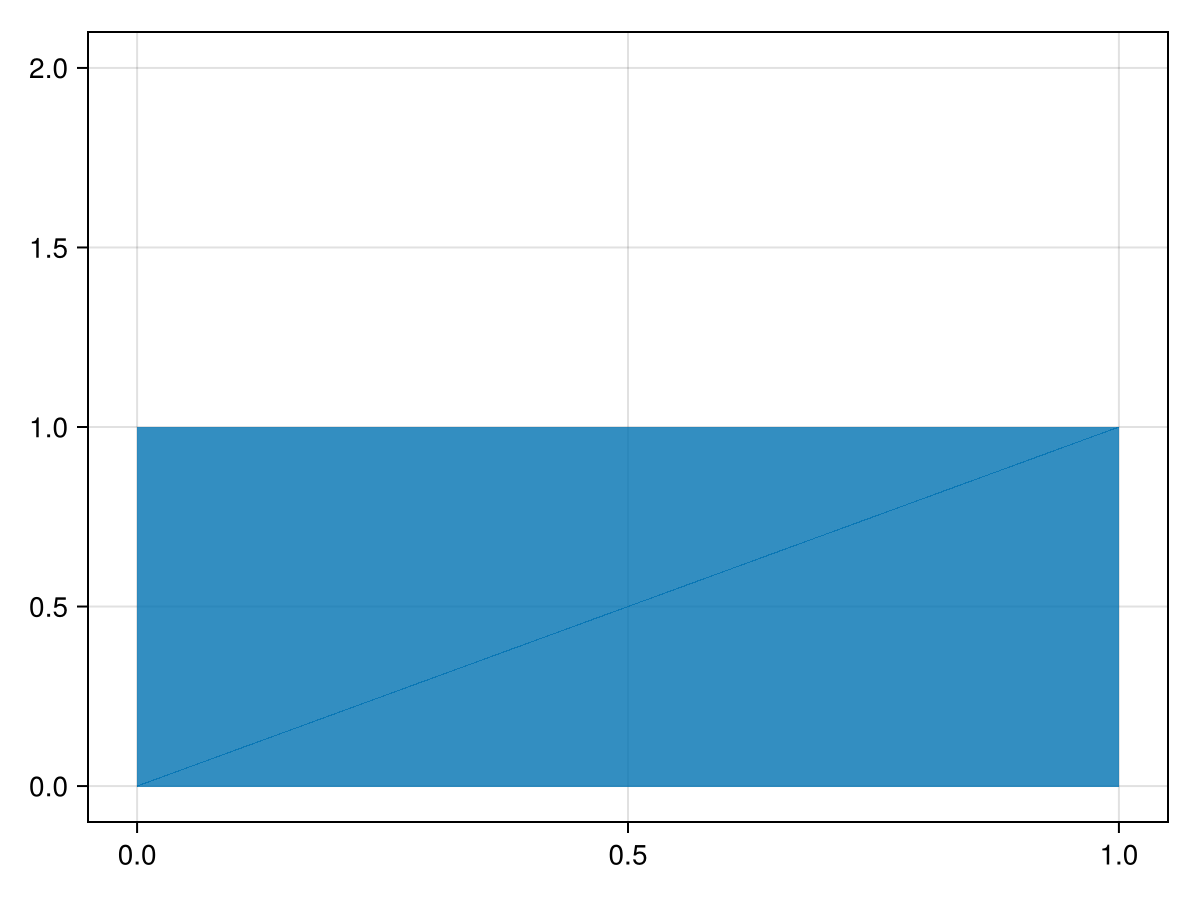

In [285]:
vertices = [
    0.0 0.0;
    1.0 0.0;
    1.0 1.0;
    0.0 1.0;
    0.0 2.0;
    0.0 2.0;
]

faces = [
    1 2 3;
    3 4 1;
]

colors = [:red, :green, :blue, :orange]

mesh(vertices, faces;
    # color=colors,
    shading=NoShading,
    # diffuse=false,
    # interpolate=false
)

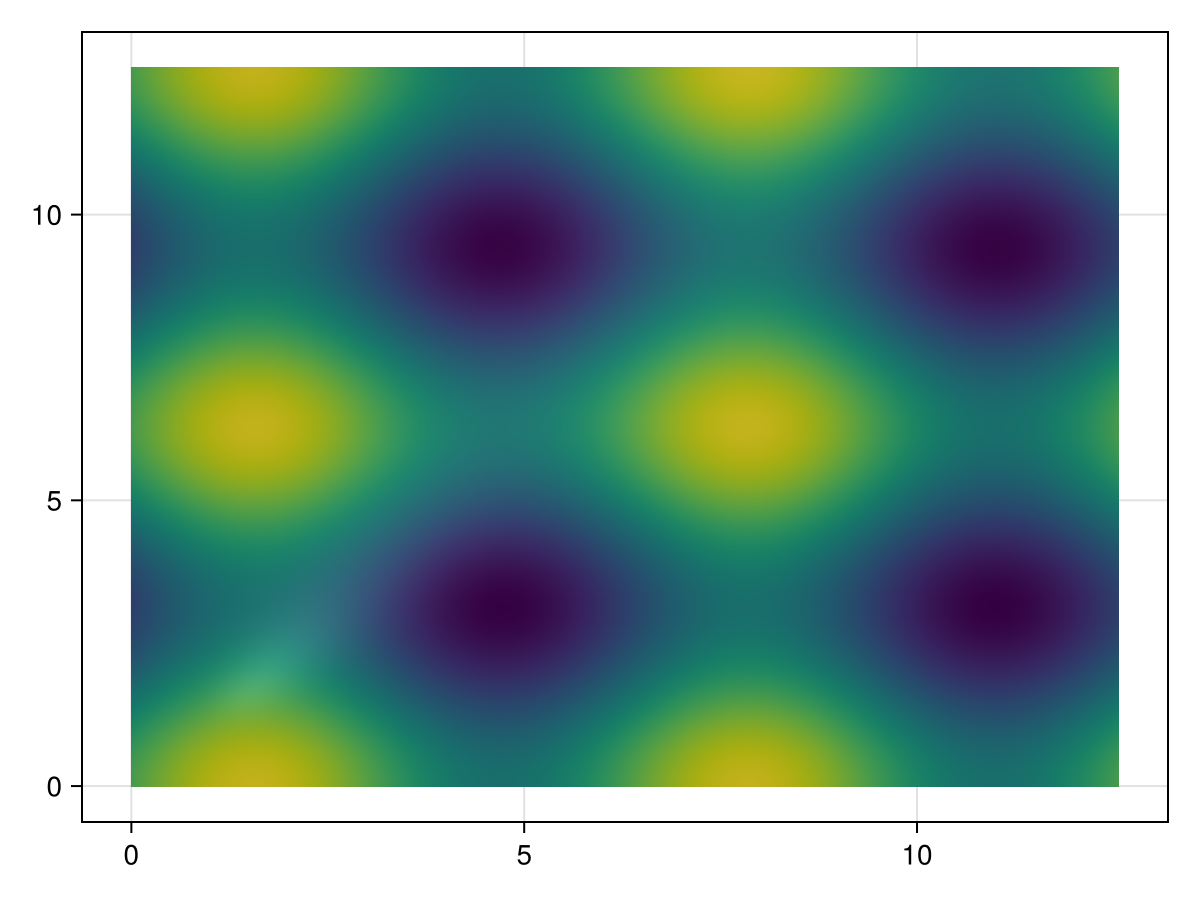

In [242]:
xs = range(0, 4*pi, 100)
ys = range(0, 4*pi, 100)
zs = sin.(xs) .+ cos.(ys')
surface(xs, ys, zeros(size(zs));
    color=zs,
    interpolate=false
)

In [204]:
xx = MAColors.bs_cmap()

In [206]:
get(xx, 1.)

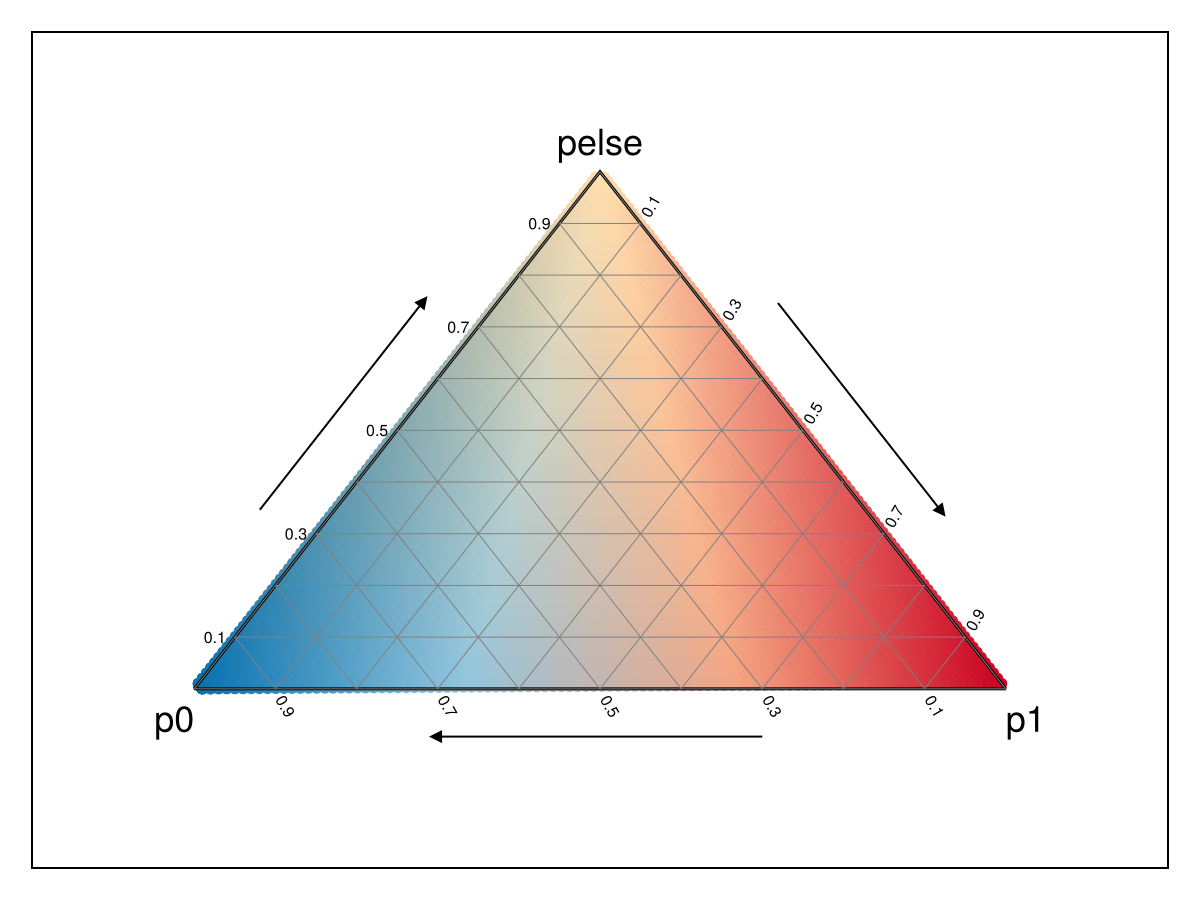

In [208]:
f = Figure()
ax = Axis(f[1,1])
all0sv1s_colors_v2_colorbar_v2!(ax;
    # epsilon=0.01,
    cmap0sv1s=MAColors.bs_cmap(),
    nondetcolor=MAColors.bs_else()
)
# display(GLMakie.Screen(), f)
f

### Version 1

In [23]:
function make_0sv1s_p3(ma)
    g = molaut_gv(ma;
        # simple_nodes=true,
        cluster=true,
    
        highlight_acs="magenta",
        node_colors=get_all0sv1s_colors_v2(ma.mg;
            cmap0sv1s=MAColors.bs_cmap(),
            nondetcolor=MAColors.bs_else()
        ),
        
        ranksep="2.",
        rankdir="LR",
        nodesep="0.1",
        size="3,3",
        dpi="300",
    )

    fname = tempname()
    GraphvizDotLang.save(g, fname; format="png")

    g, fname
end
make_0sv1s_p3(L, r; reduced=false) = make_0sv1s_p3(MolAut(L, r; reduced))

make_0sv1s_p3 (generic function with 2 methods)

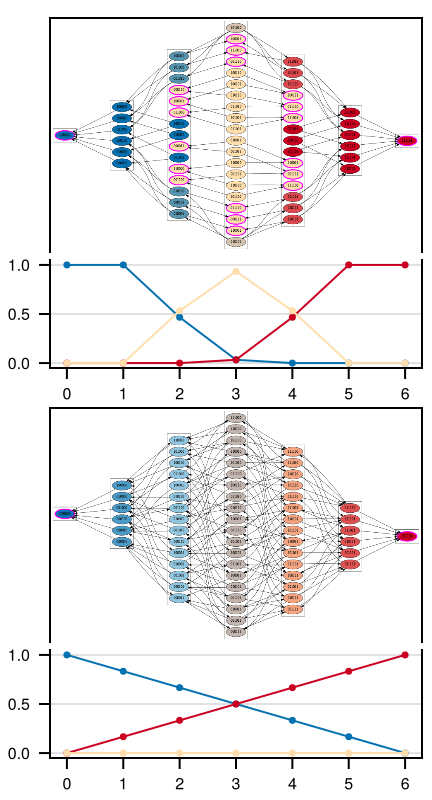

In [28]:
f = Figure(;
    size=(double_col_width / 3, double_col_width / golden_ratio),
    fontsize=8,
    figure_padding=5.,
)
ax1 = Axis(f[1,1];
    aspect=DataAspect()
)
ax2 = Axis(f[2,1])
ax3 = Axis(f[3,1];
    aspect=DataAspect()
)
ax4 = Axis(f[4,1])

_, fn = make_0sv1s_p3(6, 232)
xx1 = load(fn)
image!(ax1, rotr90(xx1))

_, fn = make_0sv1s_p3(6, 170)
xx2 = load(fn)
image!(ax3, rotr90(xx2))

for ax in [ax1, ax3]
    hidedecorations!(ax)
    hidespines!(ax, :b)
end

# plot the avg splitprobs
sckw = (;
    markersize=5,
    linewidth=1
)

num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(MolAut(6, 232).mg)
scatterlines!(ax2, num1s, p0s; sckw..., color=MAColors.bs_0s())
scatterlines!(ax2, num1s, p1s; sckw..., color=MAColors.bs_1s())
scatterlines!(ax2, num1s, pxs; sckw..., color=MAColors.bs_else())
num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(MolAut(6, 170).mg)
scatterlines!(ax4, num1s, p0s; sckw..., color=MAColors.bs_0s())
scatterlines!(ax4, num1s, p1s; sckw..., color=MAColors.bs_1s())
scatterlines!(ax4, num1s, pxs; sckw..., color=MAColors.bs_else())

for ax in [ax2, ax4]
    ax.xgridvisible = false
    # ax.ygridvisible = false
    ax.yticks = range(0., 1., 3)
    hidespines!(ax, :t)
end

# rowsize!(f.layout, 1, Auto(true, 1.5))
rowsize!(f.layout, 2, Relative(0.15))
rowsize!(f.layout, 4, Relative(0.15))

rowgap!(f.layout, 0.)

# display(GLMakie.Screen(), f)
save("../data/figures/0sv1s/draft1.pdf", f)
f

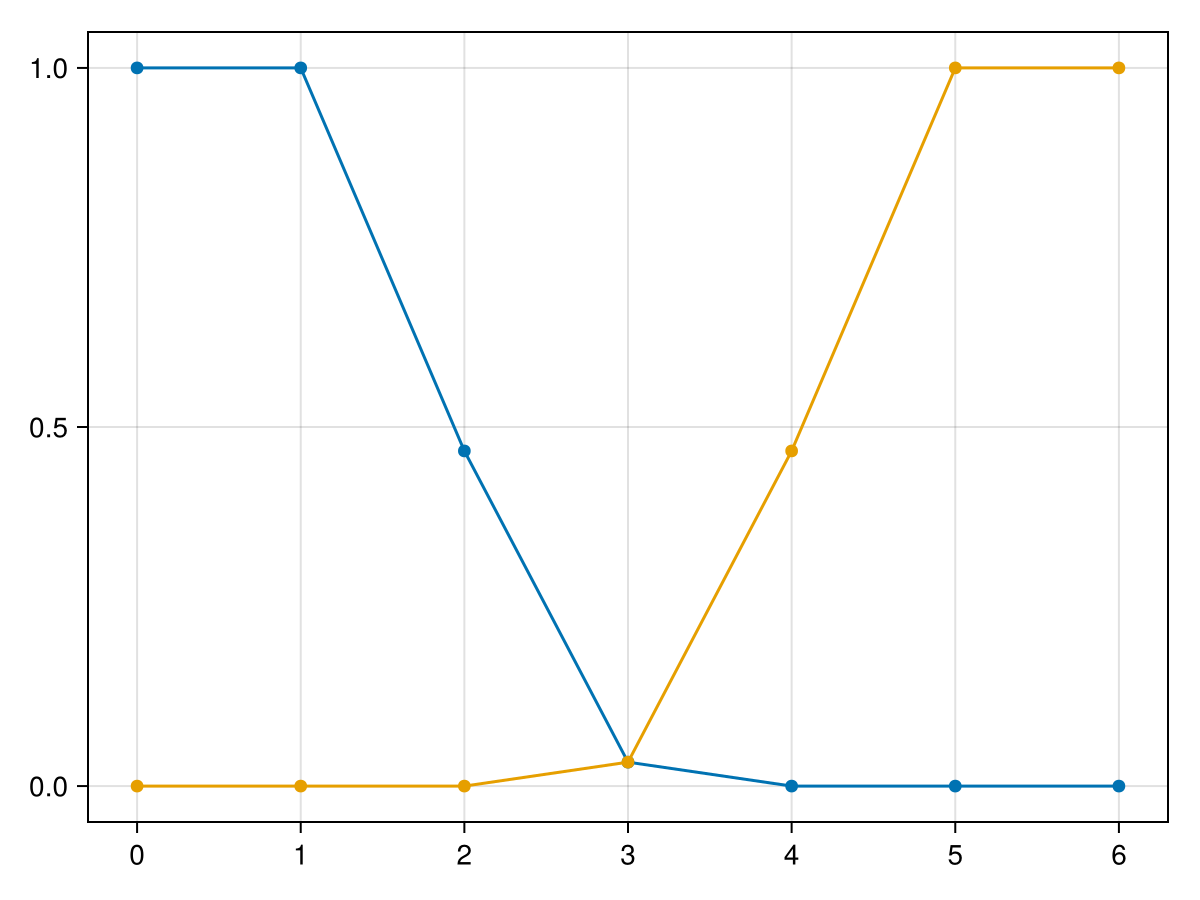

In [222]:
ma = MolAut(6, 232);
num1s, p0s, p1s = get_all0sv1s_avg_splitprobs(ma.mg)

fap = scatterlines(num1s, p0s)
scatterlines!(fap.axis, num1s, p1s)
fap

# Testing

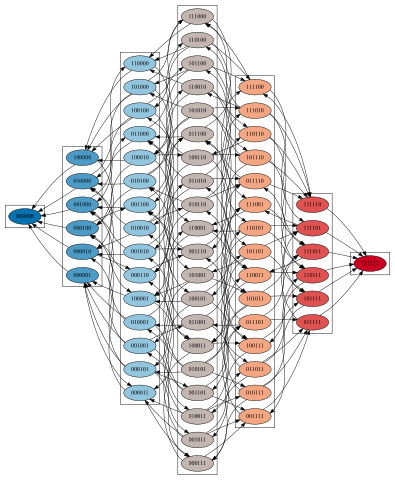

In [365]:
# ma = MolAut(6, 232)
ma = MolAut(6, 170)
g = molaut_gv(ma;
    # simple_nodes=true,
    cluster=true,

    # highlight_acs="magenta",
    node_colors=get_all0sv1s_colors_v2(ma.mg;
        # cmap0sv1s=ColorSchemes.diverging_tritanopic_cwr_75_98_c20_n256,
        nondetcolor=colorant"white",
    ),
    
    ranksep="0.8",
    size="5",
    rankdir="LR",
)

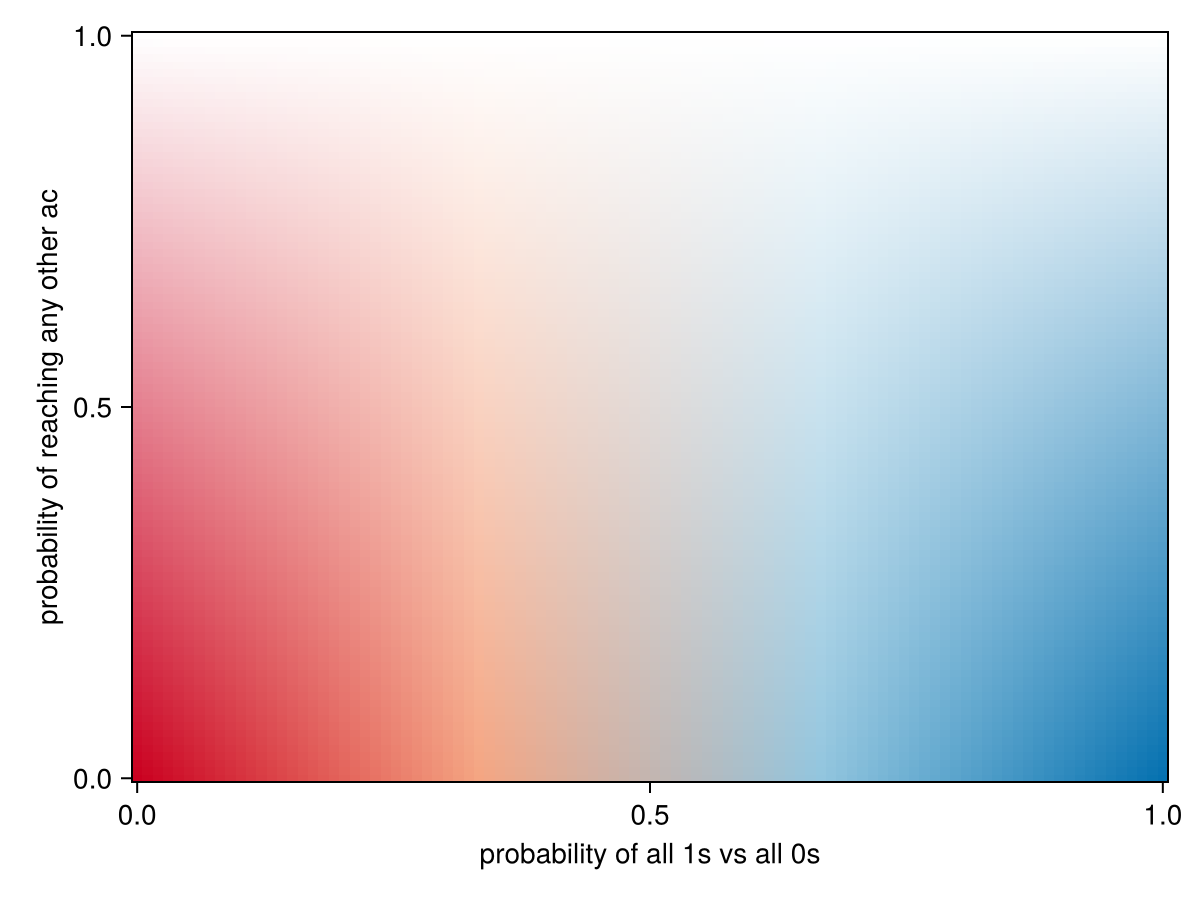

In [366]:
all0sv1s_colors_v2_colorbar(
        nondetcolor=colorant"white",
)

# Make many plots

In [91]:
L = 6
for r in ca_ucodes_f1()
    g = make_0sv1s_p1(L, r;
        reduced=false
    )
    GraphvizDotLang.save(g, "../data/figures/0sv1s/many_full/$r.pdf"; format="pdf")
end

In [92]:
L = 6
for r in ca_ucodes_f1()
    g = make_0sv1s_p1(L, r;
        reduced=true
    )
    GraphvizDotLang.save(g, "../data/figures/0sv1s/many_red/$r.pdf"; format="pdf")
end

In [101]:
K01 = [0 1; 1 1]
display(K01)
K10 = copy(K01)
K10[1,1] = K01[2,2]
K10[2,2] = K01[1,1]
K10[1,2] = K01[2,1]
K10[2,1] = K01[1,2]
r = Ks_to_cacode(K01, K10)
@show r
r in ca_ucodes_f1()

2×2 Matrix{Int64}:
 0  1
 1  1

r = 178


true

# Bits and bobs

In [3]:
GC.gc()
empty!(Out)
GC.gc()